# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import ttest_ind

df = pd.read_csv("nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [3]:
# Extract smoking status for males and females
smoke_female = df[(df['RIAGENDR'] == 2) & (df['SMQ020'] == 1)]  # Women who smoke
smoke_male = df[(df['RIAGENDR'] == 1) & (df['SMQ020'] == 1)]    # Men who smoke

# Count smokers and total people per gender
smokers = np.array([len(smoke_female), len(smoke_male)])
total = np.array([
    len(df[df['RIAGENDR'] == 2]),  # Total women
    len(df[df['RIAGENDR'] == 1])   # Total men
])

# Perform two-proportion z-test
z_stat, p_val = proportions_ztest(smokers, total)

# Print results
print(f"Z-statistic: {z_stat:.4f}, P-value: {p_val:.4f}")

Z-statistic: -16.0140, P-value: 0.0000


__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

Since the p-value is compared to the 0.05 significance level, if p < 0.05, we reject the null hypothesis and conclude that the smoking rates between men and women differ. If p > 0.05, we fail to reject the null, meaning there is no strong evidence that the proportions differ.

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [4]:
# Compute proportions
p_female = smokers[0] / total[0]
p_male = smokers[1] / total[1]

# Compute standard errors
se_female = np.sqrt(p_female * (1 - p_female) / total[0])
se_male = np.sqrt(p_male * (1 - p_male) / total[1])
se_diff = np.sqrt(se_female**2 + se_male**2)

# Compute confidence intervals
ci_female = (p_female - 1.96 * se_female, p_female + 1.96 * se_female)
ci_male = (p_male - 1.96 * se_male, p_male + 1.96 * se_male)
ci_diff = ((p_female - p_male) - 1.96 * se_diff, (p_female - p_male) + 1.96 * se_diff)

print(f"95% CI for female smoking rate: {ci_female}")
print(f"95% CI for male smoking rate: {ci_male}")
print(f"95% CI for difference: {ci_diff}")

95% CI for female smoking rate: (0.2879023206749516, 0.3209686470669839)
95% CI for male smoking rate: (0.4934902211293819, 0.5307939397984904)
95% CI for difference: (-0.2326312298280253, -0.18278196335791153)


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

If the confidence interval for the difference in proportions includes zero, it suggests no significant difference. If the entire interval is above or below zero, it strengthens the rejection of the null hypothesis.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [9]:
# Partition data based on education
college_grad = df[df['DMDEDUC2'] == 5]['BMXHT'].dropna()  # College graduates
no_college = df[df['DMDEDUC2'] < 5]['BMXHT'].dropna()    # Non-graduates

# Perform t-test for height in cm
t_stat, p_val = stats.ttest_ind(college_grad, no_college, nan_policy='omit')

print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

# Partition data based on education
college_grad = df[df['DMDEDUC2'] == 5]['BMXHT'].dropna()  # College graduates
no_college = df[df['DMDEDUC2'] < 5]['BMXHT'].dropna()    # Non-graduates

# Perform t-test for height in cm
t_stat, p_val = stats.ttest_ind(college_grad, no_college, nan_policy='omit')

print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

T-statistic: 7.5692, P-value: 0.0000
T-statistic: 7.5692, P-value: 0.0000


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

If the p-value < 0.05, we reject the null hypothesis and conclude that the average height differs between college graduates and non-graduates. If the p-value is larger, we do not have sufficient evidence to claim a difference.

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

Since inches and centimeters are directly proportional, the test results should be numerically identical. The interpretation remains unchanged.

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [10]:
# Filter BMI data for men in the age groups
bmi_30_40 = df[(df['RIAGENDR'] == 1) & (df['RIDAGEYR'].between(30, 40))]['BMXBMI'].dropna()
bmi_50_60 = df[(df['RIAGENDR'] == 1) & (df['RIDAGEYR'].between(50, 60))]['BMXBMI'].dropna()

# T-test
t_stat, p_val = stats.ttest_ind(bmi_30_40, bmi_50_60, nan_policy='omit')

print(f"BMI t-test: T-statistic={t_stat:.4f}, P-value={p_val:.4f}")

# Log-transform BMI
bmi_30_40_log = np.log(bmi_30_40)
bmi_50_60_log = np.log(bmi_50_60)

# Conduct t-test on log-transformed BMI
t_stat_log, p_val_log = stats.ttest_ind(bmi_30_40_log, bmi_50_60_log, nan_policy='omit')

print(f"Log BMI t-test: T-statistic={t_stat_log:.4f}, P-value={p_val_log:.4f}")

BMI t-test: T-statistic=0.8984, P-value=0.3692
Log BMI t-test: T-statistic=0.7058, P-value=0.4805


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

If the p-value is low (<0.05), we reject the null hypothesis and conclude that BMI differs significantly across age groups. If the p-value is high, we do not have sufficient evidence to claim a difference.
Log transformation can help normalize the data and reduce skewness, potentially affecting test results.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

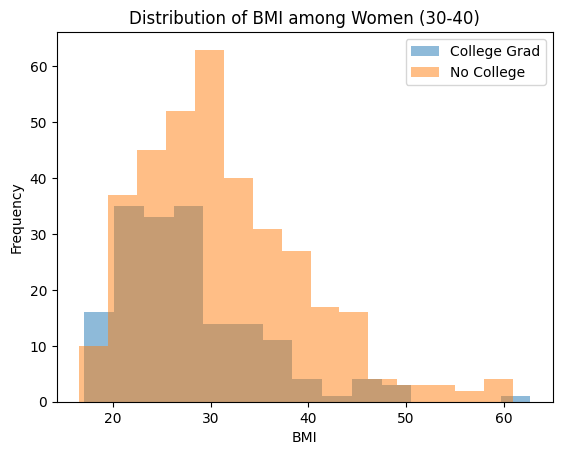

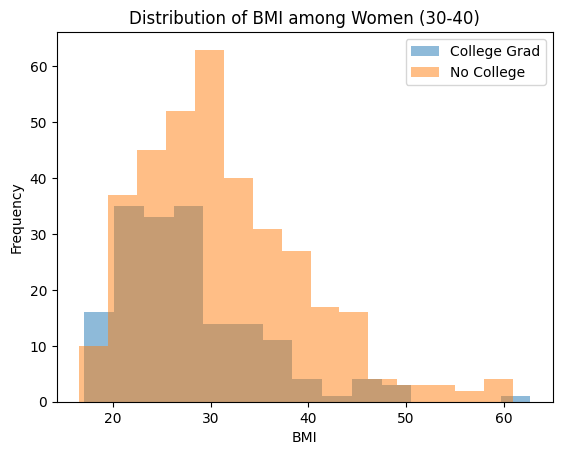

In [11]:
# Filter BMI data for women 30-40 by education
bmi_women_college = df[(df['RIAGENDR'] == 2) & (df['RIDAGEYR'].between(30, 40)) & (df['DMDEDUC2'] == 5)]['BMXBMI'].dropna()
bmi_women_no_college = df[(df['RIAGENDR'] == 2) & (df['RIDAGEYR'].between(30, 40)) & (df['DMDEDUC2'] < 5)]['BMXBMI'].dropna()

# Histogram comparison
plt.hist(bmi_women_college, alpha=0.5, label='College Grad', bins=15)
plt.hist(bmi_women_no_college, alpha=0.5, label='No College', bins=15)
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI among Women (30-40)')
plt.show()

# Filter BMI data for women 30-40 by education
bmi_women_college = df[(df['RIAGENDR'] == 2) & (df['RIDAGEYR'].between(30, 40)) & (df['DMDEDUC2'] == 5)]['BMXBMI'].dropna()
bmi_women_no_college = df[(df['RIAGENDR'] == 2) & (df['RIDAGEYR'].between(30, 40)) & (df['DMDEDUC2'] < 5)]['BMXBMI'].dropna()

# Histogram comparison
plt.hist(bmi_women_college, alpha=0.5, label='College Grad', bins=15)
plt.hist(bmi_women_no_college, alpha=0.5, label='No College', bins=15)
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI among Women (30-40)')
plt.show()

__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

If p < 0.05, there is strong evidence against the null hypothesis, meaning BMI significantly differs between the two groups. If p > 0.05, we lack sufficient evidence.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

If the variances of the two groups are significantly different, the assumption of equal variances may not hold, which can impact the reliability of the standard error calculation.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [12]:
# Drop missing values for paired comparison
bp_data = df[['BPXDI1', 'BPXDI2']].dropna()

# Paired t-test
t_stat, p_val = stats.ttest_rel(bp_data['BPXDI1'], bp_data['BPXDI2'])

print(f"Paired T-test: T-statistic={t_stat:.4f}, P-value={p_val:.4f}")

Paired T-test: T-statistic=4.1404, P-value=0.0000


__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

If p < 0.05, there is significant evidence that the two measurements differ. If p > 0.05, we do not have enough evidence to claim a difference.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modify the analysis above as appropriate for this setting.

In [13]:
# Perform independent t-test instead of paired t-test
t_stat_ind, p_val_ind = stats.ttest_ind(bp_data['BPXDI1'], bp_data['BPXDI2'], nan_policy='omit')

print(f"Independent T-test: T-statistic={t_stat_ind:.4f}, P-value={p_val_ind:.4f}")

Independent T-test: T-statistic=1.4058, P-value=0.1598


__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceding two parts of the question differ.

The paired t-test accounts for within-subject variability, leading to a more precise comparison.
	•	The independent t-test treats measurements as coming from different people, which ignores within-subject dependencies and may lead to different results.